In [1]:
from transformers import YolosFeatureExtractor, YolosForObjectDetection
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
image_path = '/content/drive/MyDrive/AI course/Computer_Vesion/Large_Vision_Models/YOLO/cars.jpg'
image = Image.open(image_path)

feature_extractor = YolosFeatureExtractor.from_pretrained('hustvl/yolos-small')
model = YolosForObjectDetection.from_pretrained('hustvl/yolos-small')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/292 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/yolos/feature_extraction_yolos.py:38: FutureWarning: The class YolosFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use YolosImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/123M [00:00<?, ?B/s]

In [5]:
from torchvision.ops import nms

In [15]:
def image_classification(image_path,confedince_threshold=0.8,iou_threshold=0.5):
  image = Image.open(image_path)

  inputs = feature_extractor(images=image, return_tensors="pt")
  outputs = model(**inputs)

  # model predicts bounding boxes and corresponding COCO classes
  logits = outputs.logits
  bboxes = outputs.pred_boxes

  # apply non-maximum suppression (NMS)
  target_sizes = torch.tensor([image.size[::-1]]) # hight/wedth inested of wedth/hight
  results = feature_extractor.post_process(outputs, target_sizes=target_sizes)[0]


  #print(results)

# filtiring results
  scores = results["scores"]
  boxes = results["boxes"]
  labels = results["labels"]

  keep =scores > confedince_threshold
  scores = scores[keep]
  boxes = boxes[keep]
  labels = labels[keep]

  keep_indices = nms(boxes,scores,iou_threshold)


  scores = scores[keep_indices]
  boxes = boxes[keep_indices]
  labels = labels[keep_indices]

  fig, ax = plt.subplots(1)
  ax.imshow(image)

  for score, box, label in zip(scores, boxes, labels):
    box = [round(i,2) for i in box.tolist()]
    xmin, ymin, xmax, ymax = box
    width, height = xmax - xmin, ymax - ymin

    rec = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rec)

    label_text = f"{model.config.id2label[label.item()]}: {round(score.item(),2)}"
    ax.text(xmin, ymin-10, label_text, fontsize=8, color='white', bbox=dict(facecolor='black', alpha=0.5))

  plt.axis('off')













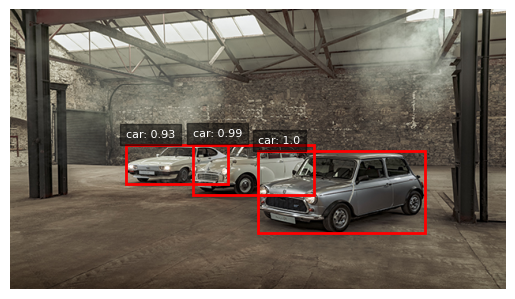

In [16]:
image_classification(image_path)

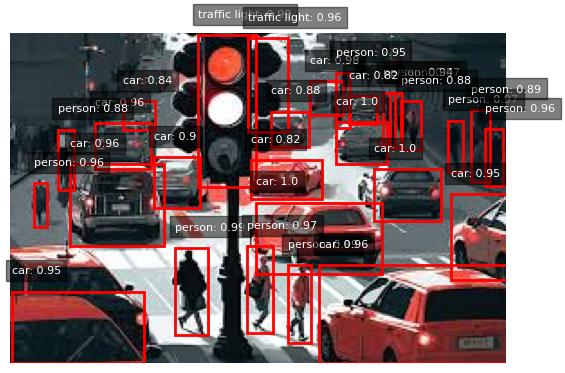

In [17]:
image_path='/content/drive/MyDrive/AI course/Computer_Vesion/Large_Vision_Models/YOLO/images.jpeg'
image_classification(image_path)

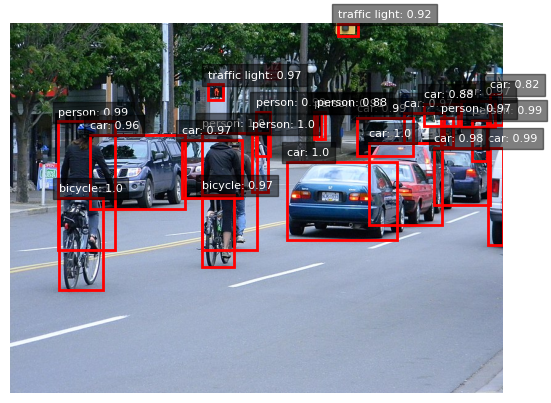

In [18]:
image_path='/content/drive/MyDrive/AI course/Computer_Vesion/Large_Vision_Models/YOLO/street.jpg'
image_classification(image_path)

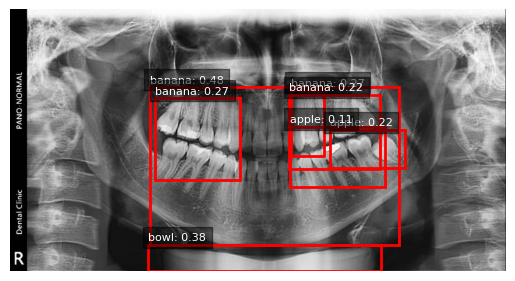

In [21]:
image_path='/content/drive/MyDrive/AI course/Computer_Vesion/Large_Vision_Models/YOLO/IMG-20220102-علاء ابوالرجال2.jpg'
image_classification(image_path,confedince_threshold=0.1)

In [ ]:
image_path='/content/drive/MyDrive/AI course/Computer_Vesion/Large_Vision_Models/YOLO/crane.jpg'
image_classification(image_path,confedince_threshold=0.5)